# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

records = 1

print('Beginning Data Retrieval')
print('------------------------------')

for citi in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={weather_api_key}"
    response = requests.get(url).json()
    time.sleep(1.1)

    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"processing record {records} | {citi}")
        records += 1
    except KeyError:
        print('city not found, skipping to next!')

Beginning Data Retrieval
------------------------------
processing record 1 | liverpool
processing record 2 | severomorsk
city not found, skipping to next!
processing record 3 | narsaq
processing record 4 | hami
processing record 5 | butaritari
processing record 6 | baleshwar
processing record 7 | oranjemund
processing record 8 | qaanaaq
processing record 9 | puerto ayora
processing record 10 | huarmey
processing record 11 | coroico
processing record 12 | ushuaia
processing record 13 | hilo
processing record 14 | mataura
processing record 15 | airai
city not found, skipping to next!
processing record 16 | karpathos
processing record 17 | fortuna
processing record 18 | busselton
processing record 19 | lebu
city not found, skipping to next!
processing record 20 | portland
processing record 21 | wanaka
processing record 22 | khatanga
processing record 23 | ponta do sol
processing record 24 | yellowknife
processing record 25 | worland
processing record 26 | punta arenas
processing record 2

processing record 224 | curup
processing record 225 | padang
processing record 226 | te anau
processing record 227 | nakamura
processing record 228 | mount gambier
processing record 229 | saint-philippe
processing record 230 | cap malheureux
processing record 231 | planaltina
processing record 232 | vinh long
processing record 233 | bandarbeyla
processing record 234 | nalut
processing record 235 | beatrice
processing record 236 | yaransk
processing record 237 | college
processing record 238 | bure
processing record 239 | gat
processing record 240 | jadu
city not found, skipping to next!
city not found, skipping to next!
processing record 241 | port-gentil
processing record 242 | kudahuvadhoo
processing record 243 | sao joao da barra
processing record 244 | elat
processing record 245 | lapi
processing record 246 | sartana
processing record 247 | mar del plata
processing record 248 | bodden town
city not found, skipping to next!
processing record 249 | hambantota
processing record 250 | 

processing record 451 | saint-pierre
processing record 452 | sobolevo
processing record 453 | marawi
processing record 454 | vostok
processing record 455 | petropavlovsk-kamchatskiy
processing record 456 | magadan
city not found, skipping to next!
processing record 457 | manzhouli
processing record 458 | tabou
processing record 459 | sao miguel do araguaia
processing record 460 | benghazi
processing record 461 | limoncito
city not found, skipping to next!
city not found, skipping to next!
processing record 462 | rawlins
processing record 463 | la tiza
processing record 464 | cabedelo
city not found, skipping to next!
processing record 465 | quatre cocos
processing record 466 | katsuura
processing record 467 | phuket
processing record 468 | marsa matruh
city not found, skipping to next!
processing record 469 | henties bay
processing record 470 | druzhba
processing record 471 | atambua
processing record 472 | noumea
processing record 473 | namibe
processing record 474 | kijang
processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Create the DataFrame

weather_dict = {"City": city,
                "Lat": lat,
                "Lng": lng,
                "Max Temp (K)": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Country": country,
                "Wind Speed": wind_speed,
                "Date": date}

In [34]:
#Export to a .csv

weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Country,Wind Speed,Date
0,Liverpool,53.41,-2.98,274.26,85,100,GB,1.00,1609204716
1,Severomorsk,69.07,33.42,266.15,79,75,RU,2.00,1609204995
2,Narsaq,60.92,-46.05,272.15,68,29,GL,3.60,1609204997
3,Kumul,42.80,93.45,261.64,75,0,CN,2.29,1609204998
4,Butaritari,3.07,172.79,300.68,79,100,KI,9.07,1609205000


In [35]:
weather_data_df.to_csv("../output_data/WeatherDataCities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_data_df.loc[weather_data_df['Humidity']>100]

hum_100.shape[0]


0

In [37]:
print(f"There are {hum_100.shape[0]} cities with humidity greater than 100.")

There are 0 cities with humidity greater than 100.


In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f" Since we have {hum_100.shape[0]} cities with humidity greater than 100, there is no need to clean the DataFrame.")

 Since we have 0 cities with humidity greater than 100, there is no need to clean the DataFrame.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

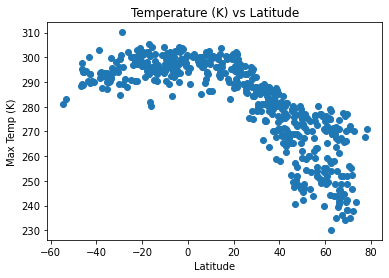

In [39]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp (K)"],marker ="o")
plt.title("Temperature (K) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
plt.savefig("../output_data/Latitude vs Temperature (K)")
plt.show()

In [1]:
print(f'The closer a city is to the equator (Lat=0), the warmer the city. The further away a city is from the equator, the cooler the city would be. Notice the plot is forming a curve shape.')

The closer a city is to the equator (Lat=0), the warmer the city. The further away a city is from the equator, the cooler the city would be. Notice the plot is forming a curve shape.


## Latitude vs. Humidity Plot

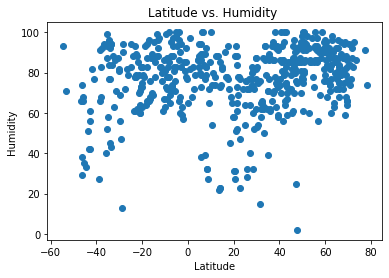

In [19]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Humidity "
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="o")
plt.title("Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/Latitude vs Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

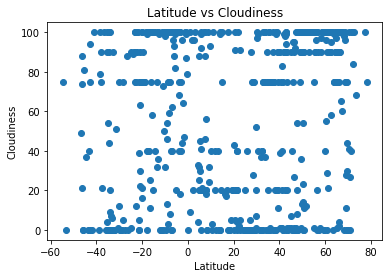

In [20]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Cloudiness"
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="o")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

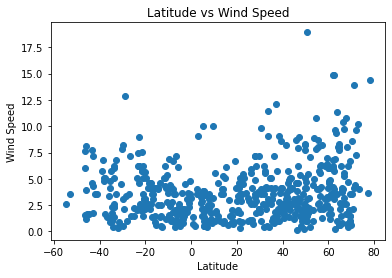

In [21]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="o")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [40]:
northen_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)>0, :]
southern_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)<0, :]


In [41]:
len(northen_hemisphere)

359

In [42]:
len(southern_hemisphere)

177

In [43]:
len(northen_hemisphere) + len(southern_hemisphere)

536

In [44]:
northen_hemisphere.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Country,Wind Speed,Date
0,Liverpool,53.41,-2.98,274.26,85,100,GB,1.00,1609204716
1,Severomorsk,69.07,33.42,266.15,79,75,RU,2.00,1609204995
2,Narsaq,60.92,-46.05,272.15,68,29,GL,3.60,1609204997
3,Kumul,42.80,93.45,261.64,75,0,CN,2.29,1609204998
4,Butaritari,3.07,172.79,300.68,79,100,KI,9.07,1609205000


In [45]:
southern_hemisphere.head()

,City,Lat,Lng,Max Temp (K),Humidity,Cloudiness,Country,Wind Speed,Date
6,Oranjemund,-28.55,16.43,289.15,90,5,NA,3.40,1609205002
8,Puerto Ayora,-0.74,-90.35,296.48,92,87,EC,2.68,1609205004
9,Huarmey,-10.07,-78.15,294.54,81,98,PE,3.68,1609205005
10,Coroico,-16.19,-67.73,280.15,87,75,BO,4.10,1609205007
11,Ushuaia,-54.80,-68.30,281.15,93,75,AR,2.60,1609204854


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitiude on the Northern Hemisphere is -0.83.


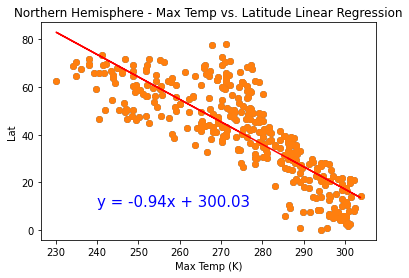

In [61]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Max Temp (K)'],northen_hemisphere['Lat'])
x = northen_hemisphere['Max Temp (K)']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Max Temp and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(240,10),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Max Temp (K)")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitiude on the Southern Hemisphere is 0.42.


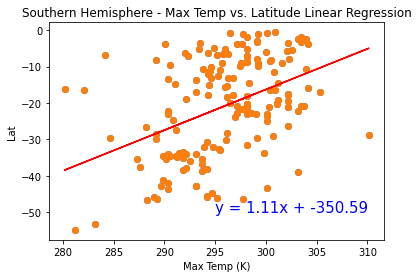

In [60]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Max Temp (K)'],southern_hemisphere['Lat'])
x = southern_hemisphere['Max Temp (K)']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Max Temp and Latitiude on the Southern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(295,-50),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Max Temp (K)")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitiude on the Northern Hemisphere is 0.27.


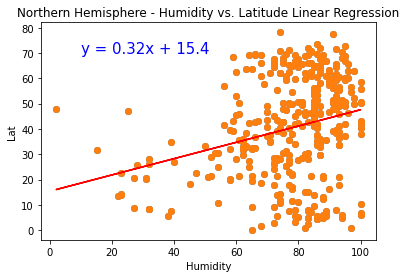

In [58]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Humidity'],northen_hemisphere['Lat'])
x = northen_hemisphere['Humidity']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Humidity and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,70),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Humidity")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitiude on the Southern Hemisphere is 0.32.


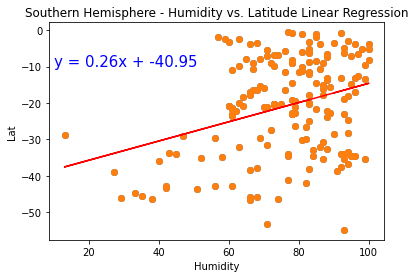

In [56]:
# Create scatter plot and determine line of regression for southern_hemisphere - Humidity vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Humidity'],southern_hemisphere['Lat'])
x = southern_hemisphere['Humidity']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Humidity and Latitiude on the Southern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,-10),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Humidity")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and Latitiude on the Northern Hemisphere is 0.32.


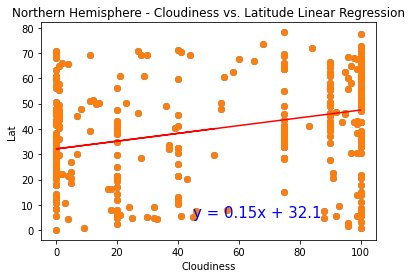

In [65]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Cloudiness vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Cloudiness'],northen_hemisphere['Lat'])
x = northen_hemisphere['Cloudiness']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Cloudiness and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(45,5),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness Latitiude on the Northern Hemisphere is 0.27.


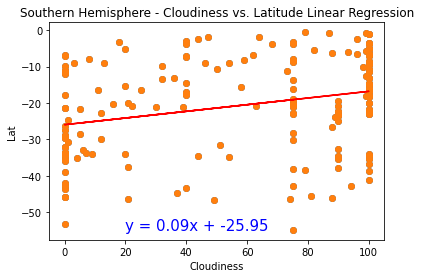

In [67]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Cloudiness vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Cloudiness'],southern_hemisphere['Lat'])
x = southern_hemisphere['Cloudiness']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Cloudiness Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,-55),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and Latitiude on the Northern Hemisphere is 0.26.


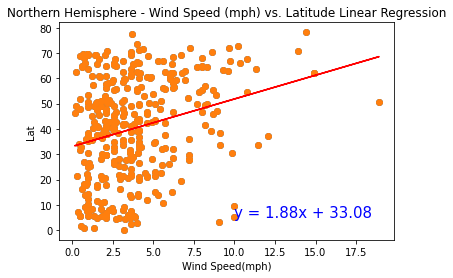

In [69]:
# Create scatter plot and determine line of regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
plt.scatter(northen_hemisphere['Wind Speed'],northen_hemisphere['Lat'])
x = northen_hemisphere['Wind Speed']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,5),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is -0.22.


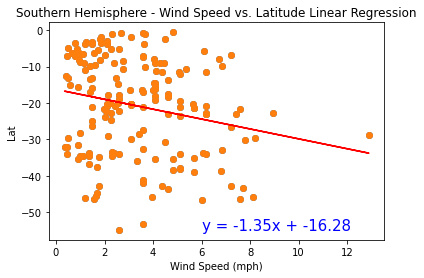

In [71]:
# Create scatter plot and determine line of regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶
plt.scatter(southern_hemisphere['Wind Speed'],southern_hemisphere['Lat'])
x = southern_hemisphere['Wind Speed']
y = southern_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Wind Speed (mph) and Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(6,-55),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Lat")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("../output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()